In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_csv('linear_relationship.csv')

In [3]:
x_train = np.array(df.Size)
y_train = np.array(df.Price)

In [ ]:
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

In [5]:
#Number of training examples 'm':
print(f"Shape of x_train: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples(m): {m}")

Shape of x_train: (1000,)
Number of training examples(m): 1000


In [6]:
#Also use the len()function
m = len(x_train)
print(m)

1000


In [ ]:
#Training Examples x_i,y_i
for i in range(len(x_train)):
    print(f"x^{i},y{i}: {x_train[i]},{y_train[i]}")

<function matplotlib.pyplot.show(close=None, block=None)>

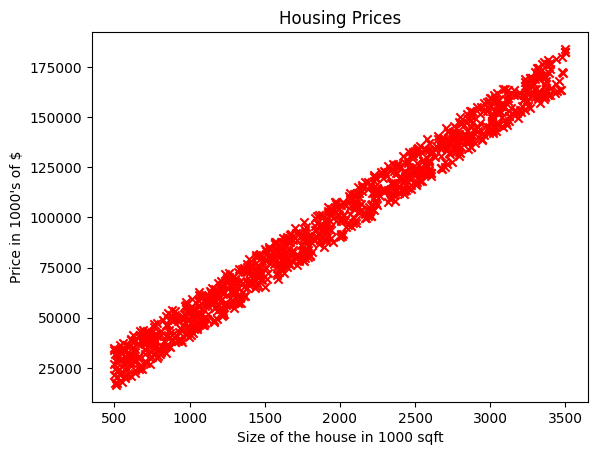

In [8]:
#Plotting the data:
plt.scatter(x_train,y_train,marker = 'x', c = 'r')
#Set the title
plt.title("Housing Prices")
#Set the y-axis label
plt.ylabel("Price in 1000's of $")
#Set the x-axis label
plt.xlabel("Size of the house in 1000 sqft")
plt.show

In [18]:
# Model Function for Linear Regression
#f(x_i)  = w*x_i + b
w = 0
b = 0

In [10]:
# Computation of f(x_i) = w * x_i + b
def compute_function(x,w,b):
    m = len(x_train) #Or np.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

<function matplotlib.pyplot.show(close=None, block=None)>

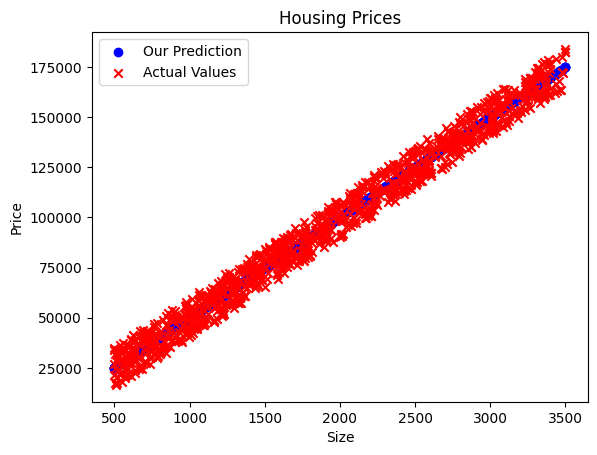

In [11]:
# Now lets call the function for our data and plot it

temp_f_wb = compute_function(x_train, w, b)

#Plot our model prediction:
plt.scatter(x_train,temp_f_wb, c = 'b', label = "Our Prediction")

#Plot the actual data points:
plt.scatter(x_train,y_train, marker = 'x', c = 'r', label = "Actual Values")

#Set the title
plt.title("Housing Prices")

#Set the y-axis label
plt.ylabel("Price")
#Set the x-axis label
plt.xlabel("Size")
plt.legend()
plt.show

<h1>Cost Function

In [12]:
def cost_function(x,y,w,b):
    m = len(x)
    f_wb = np.zeros(m)
    squared_error = 0
    for i in range(m):
        f_wb[i] = w * x[i]+ b
        squared_error+= (f_wb[i] - y[i])**2

    mean_squared_error = (1/(2*m))*squared_error
    return mean_squared_error

In [13]:
cost_function(x_train,y_train,w,b)

np.float64(16681894.668)

<h1>Gradient Descent

In [20]:
# Calculating Gradients (w & b)
def compute_gradients(w,x,b,y):
    alpha = 0.001
    m = x.shape[0]
    dw = 0
    db = 0
    for i in range(m):
        dw += ((w * x[i]+ b) - y[i])*x[i]
        db += (w * x[i]+ b) - y[i]
    w = w - alpha * 1/m * dw
    b = b - alpha * 1/m * db
    return w , b

In [23]:
def compute_gradient_descent(x,y,w,b,iterations):
    w_history = []
    b_history = []
    m = x.shape[0]
    for i in range(iterations):
        w,b = compute_gradients(w,x,b,y)
        
        w_history.append(w)
        b_history.append(b)
    
    mean_squared_error = 0
    for i in range(m):
        error = ((w * x[i] + b) - y[i])**2
        mean_squared_error += error
    mean_squared_error = 1/(2*m) * mean_squared_error
    return w,b,mean_squared_error
        

In [25]:
#Normalizing x_train
for i in range(m):
    x_train[i] = (x_train[i]-np.mean(x_train))/np.std(x_train)

In [26]:
compute_gradient_descent(x_train,y_train,w,b,1000)

(np.float64(14782.984098434148),
 np.float64(50705.68417349366),
 np.float64(1449391888.374493))